In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('internships.csv')

In [4]:
print("true are ", (df['authentic']==1).sum())
print("fake are", (df['authentic']==0).sum())

true are  329
fake are 762


In [5]:
df.columns

Index(['Unnamed: 0', 'job_title', 'company_name', 'location', 'salary',
       'description', 'company_description', 'hired_to_posted_ratio',
       'has_company_logo', 'job_description_length', 'Important_Word_Count',
       'important_words', 'currency_in_title', 'authentic', 'htp_ratio',
       'result'],
      dtype='object')

In [30]:
df=df.iloc[:150]
df

,Unnamed: 0,job_title,company_name,location,salary,description,company_description,hired_to_posted_ratio,has_company_logo,job_description_length,Important_Word_Count,important_words,currency_in_title,authentic,htp_ratio,result
0,0,iOS App Development,STEMpedia,Ahmedabad,"₹ 9,000-15,000 /month",Selected intern's day-to-day responsibilities ...,1,0.365782,1,1,5,1,1,1,1,1.0
1,1,Internet Of Things (IoT),Purewatt Renewables Private Limited,Gunupur,"₹ 10,000 /month",Selected intern's day-to-day responsibilities ...,1,0.333333,1,1,0,0,1,0,1,1.0
2,2,Product Management,FynTune Solution Private Limited,Thane,"₹ 12,000-18,000 /month",Selected intern's day-to-day responsibilities ...,1,0.392405,1,1,10,1,1,1,1,1.0
3,3,Web Development,Space Chase Private Limited,Work From Home,"₹ 5,000 /month",Selected intern's day-to-day responsibilities ...,1,0.000000,1,1,6,1,1,0,0,1.0
4,4,Web Development,Digital Yodha,Work From Home,"₹ 1,500 /month",Selected intern's day-to-day responsibilities ...,1,0.333333,1,1,2,1,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,Product Management,HappiMynd,Work From Home,"₹ 1,000-2,000 /month",Selected intern's day-to-day responsibilities ...,1,0.196765,1,1,0,0,1,0,1,1.0
146,146,Software Training,SR Edu Technologies,Work From Home,"₹ 5,000 /month + Incentives",Selected intern's day-to-day responsibilities ...,1,0.022727,1,1,3,1,1,0,0,1.0
147,147,Front End Development,SuperBio,Work From Home,"₹ 5,000 /month",Selected intern's day-to-day responsibilities ...,1,0.250000,1,1,5,1,1,1,1,1.0
148,148,Backend Development,SuperBio,Work From Home,"₹ 5,000 /month",Selected intern's day-to-day responsibilities ...,1,0.250000,1,1,5,1,1,1,1,1.0


In [31]:
df=df[df.columns[6:16]]
df

,company_description,hired_to_posted_ratio,has_company_logo,job_description_length,Important_Word_Count,important_words,currency_in_title,authentic,htp_ratio,result
0,1,0.365782,1,1,5,1,1,1,1,1.0
1,1,0.333333,1,1,0,0,1,0,1,1.0
2,1,0.392405,1,1,10,1,1,1,1,1.0
3,1,0.000000,1,1,6,1,1,0,0,1.0
4,1,0.333333,1,1,2,1,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...
145,1,0.196765,1,1,0,0,1,0,1,1.0
146,1,0.022727,1,1,3,1,1,0,0,1.0
147,1,0.250000,1,1,5,1,1,1,1,1.0
148,1,0.250000,1,1,5,1,1,1,1,1.0


In [33]:
df['result']=df['result'].astype(int)

C:\Users\Atul Maharnawar\AppData\Local\Temp\ipykernel_15384\1814374968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['result']=df['result'].astype(int)


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

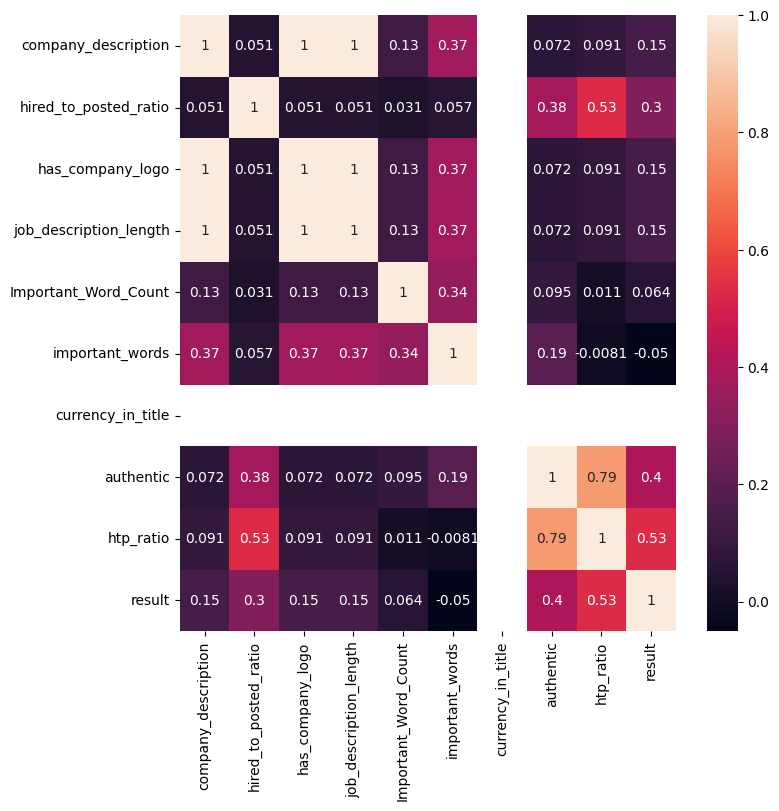

In [36]:
plt.figure(figsize=(8,8))
sns.heatmap(data=df.corr(),annot=True)


In [63]:
df2=df['result']
df3=df.drop(columns=['result','authentic','htp_ratio','Important_Word_Count'])

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df3, df2, test_size = 0.3, random_state = 21)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
y_pred = rfc.predict(X_test)

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.7778
